# Logistic Regression Analysis of Breast Cancer Data

### Each observation represents a tumor with its malignancy acting as the dependent variable 

### A '0' represents malignancy, a '1' implies that the tumor is benign. 

## Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [10]:
data = load_breast_cancer()

cancer_data = pd.DataFrame(data.data, columns=data.feature_names)

cancer_data['malignancy'] = data.target

cancer_data.head(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignancy
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


## Split Data into Matrix of Features(x) and Dependent Variable(y)

In [3]:
x = cancer_data.iloc[:,:-1].values
y = cancer_data.iloc[:, -1].values

## Split Data into Training and Test Sets

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

## Feature Scale the Matrix 

In [5]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Instantiate and Train the Model

In [6]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

## Make and Compare Predictions about Malignancy 

In [7]:
y_pred = classifier.predict(x_test)

test_and_predict = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1)
#test_and_predict

## Increase the Threshold for Dismissal of Malignancy 

### This will help avoid false negatives though may increase false positives

In [32]:
y_prob = classifier.predict_proba(x_test)[:,1]
threshold = 0.7
y_adjusted = (y_prob > threshold).astype(int)


## Create a Confusion Matrix with Standard 0.5 Threshold 

In [40]:
cm_standard = confusion_matrix(y_test, y_pred) #always put test data (y_true) first and predicted values second at instantiation

disp_standard = ConfusionMatrixDisplay(confusion_matrix = cm_standard)

AS_standard = accuracy_score(y_test,y_pred)

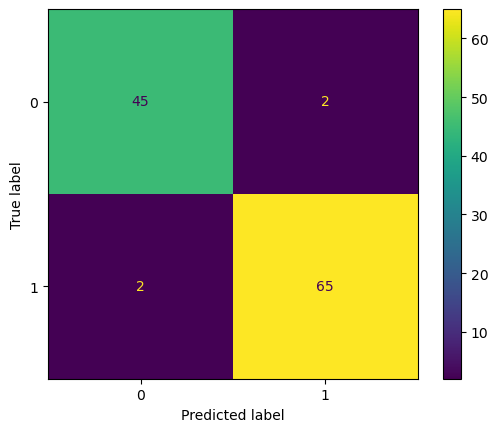

In [63]:

disp_standard.plot()

In [45]:
print(f"The Accuracy Score for predictions using standard threshold: {round(AS_standard,3)}")

The Accuracy Score for predictions using standard threshold: 0.965


## Create a Confusion Matrix with Adjusted 0.7 Threshold

#### With this threshold, malignancy is only dismissed if there is a greater than 70% probability of the tumor being benign

#### This decreases false negatives slightly while also increasing false positives slightly. 

#### In the context of cancer diagnosis, managing false negatives is arguably most critical 

In [35]:
cm_adjusted = confusion_matrix(y_test, y_adjusted) 

disp_adjusted = ConfusionMatrixDisplay(confusion_matrix = cm_adjusted)

AS_adjusted = accuracy_score(y_test,y_adjusted)

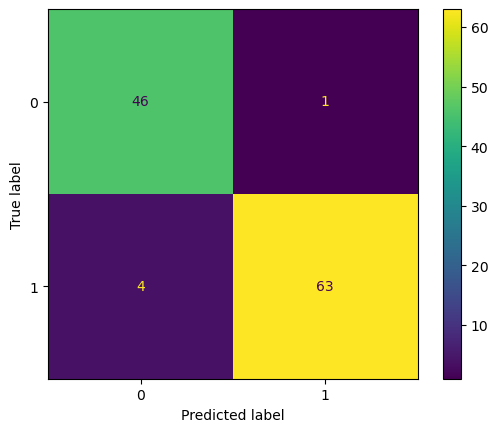

In [36]:
disp_adjusted.plot()

In [46]:
print(f"The Accuracy Score for predictions using adjusted threshold: {round(AS_adjusted,3)}")

The Accuracy Score for predictions using adjusted threshold: 0.956


## Visualize Model Predictions for Malignancy Probability

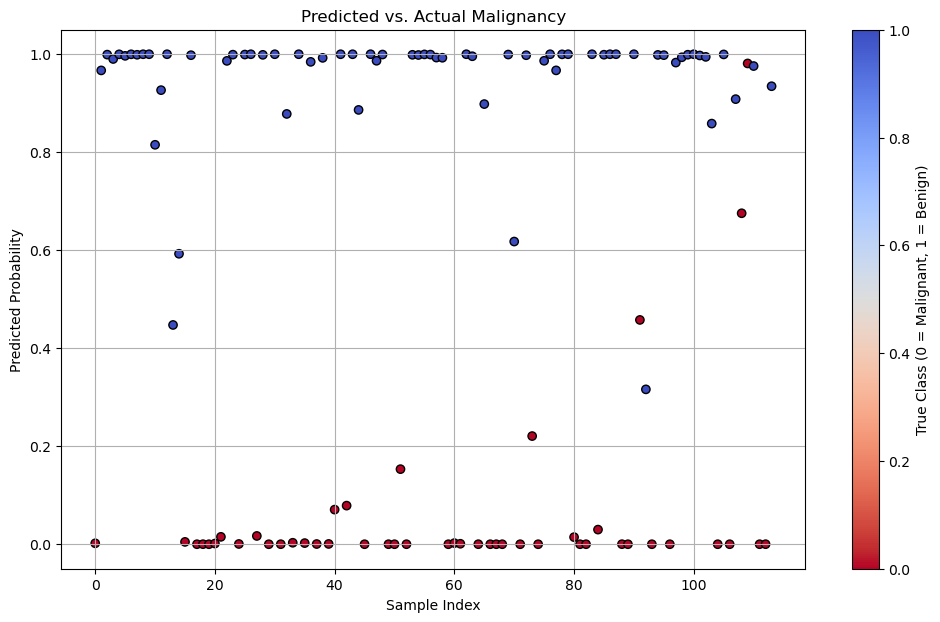

In [59]:
 
plt.figure(figsize=(12, 7))
plt.scatter(range(len(y_test)), y_prob, c = y_test, cmap='coolwarm_r', edgecolors='k')
plt.title('Predicted vs. Actual Malignancy')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.colorbar(label='True Class (0 = Malignant, 1 = Benign)')
plt.grid(True)
plt.show()